## Supervised Learning

#### Classification and Regression

Two major types:Classifcation and Regression

Classification:  Goal is predict a class of a label, which is a choice from a predefined list of possibiltiies. 
May be separated in binary classification and multiclass classicaition. 
In binary we often use the term positive (when the prediction is good) and negative when is bad.

Example: Binary (Yes/No for a spam) or multiclass (Iris example)


For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms.

Example: Predicting a person income or a yeld of corn for a farm.


It helps to think in terms of continuity. Regression is continuity. For example, if the algorithm predicts the income as 39.999 and no 40.000 there is no much of a problem, but and email can either be spam or not spam (there is no continuity).

#### Generalization, Overfitting and Underfitting

Generalization means being able to make accurate predictions on unseen data, and generalize from training set to test set

Overfitting occurs when you fit a model too closely to the particularities of the training set and works well on the training set, but it is not able to generalize to new data. It is building a model too complex for the amount of information. I.e 100% accuracy on training set that only people over 50, not divorced and that own a dog, buy a boat.


Underfitting- Choosing a model too simple. i.e everybody who owns a house, buy a boat.


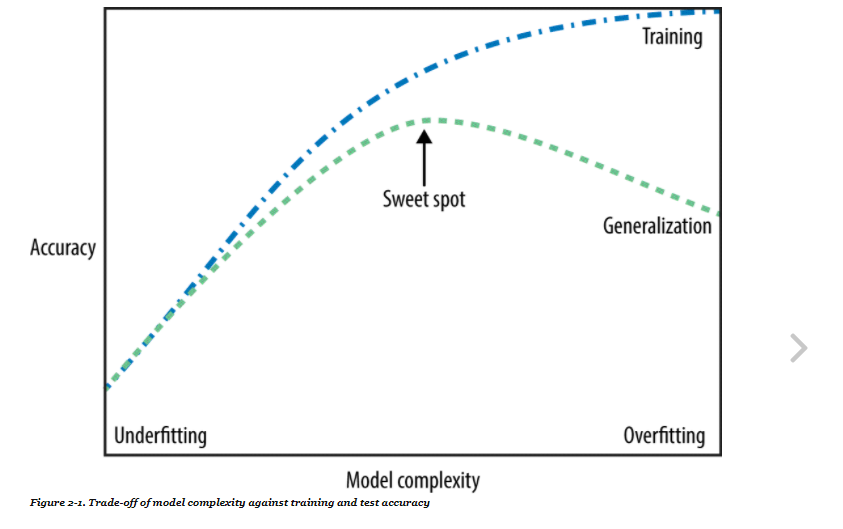

### Models

In [64]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import mglearn

Python version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]
pandas version: 0.24.2
matplotlib version: 3.1.1
NumPy version: 1.16.4
SciPy version: 1.3.1
IPython version: 6.4.0
scikit-learn version: 0.22.1


### Some samples datasets

X.shape: (26, 2)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


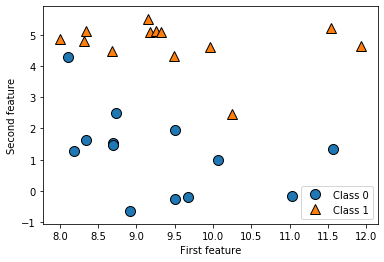

In [65]:
from matplotlib import pyplot as plt

# generate dataset
X, y = mglearn.datasets.make_forge()

# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

The above shows the single feature on the x-axis and the regression (output) on the y-axis

Text(0, 0.5, 'Target')

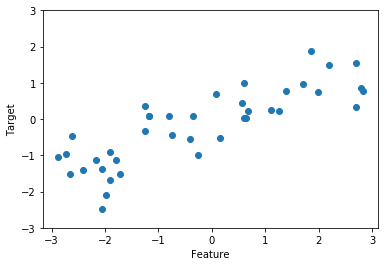

In [66]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

#### Cancer Dataset

In [67]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Bunch objects - datasets are usually stored as bunch objects.  They behave like dictionaries, with the added benefit you can access values using a dot (as in bunch. key  istead of bunch['key']

In [68]:
#Example - bunch object
print ("shape of cancer data: ", cancer.data.shape)

shape of cancer data:  (569, 30)


In [69]:
#Sample counts per class
print ("Sample counts per class: \n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class: 
 {'malignant': 212, 'benign': 357}


In [70]:
# Get a description of semantics
print ("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [71]:
#Finding more about the dataset
print (cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

#### Boston Housing Dataset

In [72]:
from sklearn.datasets import load_boston
boston = load_boston()
print ("Data shape:", boston.data.shape)

Data shape: (506, 13)


In [73]:
#printing keys
print (boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [74]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [75]:
#Using feature engineering (Chapter 4) and expanding dataset

X, y = mglearn.datasets.load_extended_boston()
print ("X.shape:", X.shape)

X.shape: (506, 104)


You can see there is 104 features, instead of 13

### k-Nearest Neighbors

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


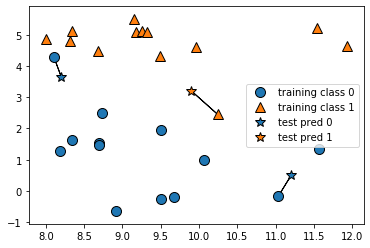

In [76]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


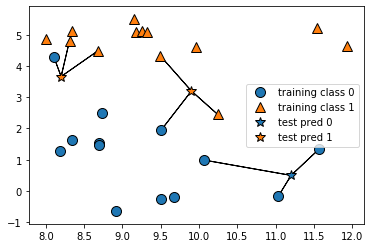

In [77]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

You can see the prediction on top left changed, based on more neighbors

#### Using scikit-learn

In [78]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [79]:
# Umport and initiate the class
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier (n_neighbors = 3)

In [80]:
#Fit the classifier using the training set
clf.fit (X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [81]:
#to make predictions we call the predict method

print ("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [82]:
#To evaluate we can call the score method
# {:.2f}".format gets to two decimals
print ("Test set accuracy {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy 0.86


### Analyzing KNeighbors Classifier

For two dimensional datasets we can illustrate the prediction for all possible test points in the xy-plane

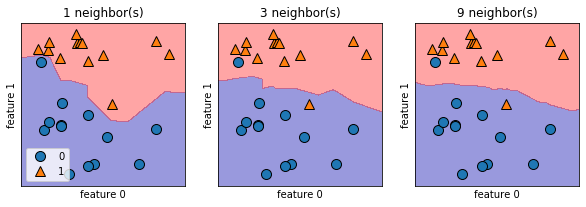

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))


for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

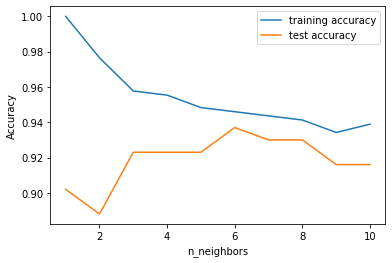

In [84]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Best performance is around 6 neighbors

In [85]:
print(training_accuracy)

[1.0, 0.9765258215962441, 0.9577464788732394, 0.9553990610328639, 0.9483568075117371, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347]


#### How to format a list

In [86]:
training_accuracy_formatted_list = ['%.2f' % elem for elem 
                                    in training_accuracy]
print (training_accuracy_formatted_list)

['1.00', '0.98', '0.96', '0.96', '0.95', '0.95', '0.94', '0.94', '0.93', '0.94']


In [87]:
## Or use this way - better
import numpy as np
training_accuracy = list(np.around(np.array(training_accuracy),2))

In [88]:
print (test_accuracy)

[0.9020979020979021, 0.8881118881118881, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.916083916083916]


In [89]:
test_accuracy = list(np.around(np.array(test_accuracy),2))
print (test_accuracy)

[0.9, 0.89, 0.92, 0.92, 0.92, 0.94, 0.93, 0.93, 0.92, 0.92]


#### Regression variant - k-neighbors regression

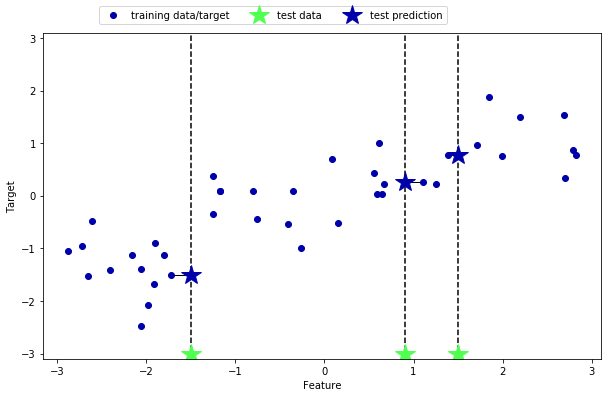

In [90]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [91]:
# KneighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [92]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [93]:
#formatting
reg_predic_X_test = reg.predict(X_test)

In [94]:
reg_predic_X_test = list(np.around(np.array(reg_predic_X_test),2))
print (reg_predic_X_test)

[-0.05, 0.36, 1.14, -1.89, -1.14, -1.63, 0.36, 0.91, -0.45, -1.14]


The R^2 score, also known as coefficient of determination, is a measure of goodness of a prediction for regression model, and yelds a score that is usually between 0 and 1, being 1 the the perfect prediction.

In [95]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analyzing KneighborsRegressor

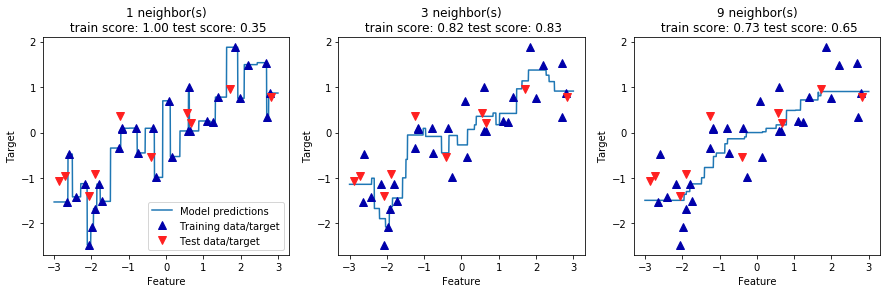

In [96]:
# make predictions with many neighboors 

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")


Using 3 neighbors yelds the best result on the test data

### Strengths, weakness, and parameters

Two important parameters:

number of neighbors - in practice using a small number (3 or 5) often works well

distance between points - beyond the scope of this book - by default Euclidean distance is used - which works well in many settings.

One of strenghts is the model is very easy to understand  - and often given reasonable performance without a lot of adjustments.

When training set is very large (either number of feature or samples) it can be slow to predict.
When using k-NN algorithm is important to preprocess your data.

usually dont work well in sparse datasets

It is good for practice but usuall there are better algorithms to use.

## Linear Models

Linear models are a class of models widely used in practice - with roots over hundred of years (old statistic).

Makes prediction uising a linear function.

### Linear models for regression

ÿ = w[0] * x[o] + w[1]* x[1] + ... w[p] * x[p] + b (Linear function)

x[o] to x [p] denotes the features.
w and p are paratemeters
y is the prediction

for a single feature:
y = w[0]* x[0] + b - the equation for a line

w[0]: 0.393906  b: -0.031804


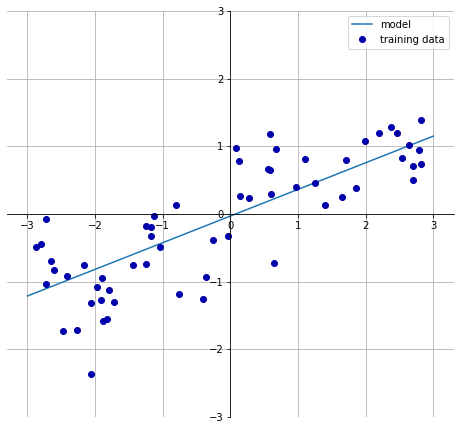

In [97]:
mglearn.plots.plot_linear_regression_wave()

w[o] we can see the slope is 0.4
b is the intercept, as you can visually see, slight below zero

It can be simplistic compared to k-NN, because it assumes the combination of features is linear, but linear model are powerfull, especially when there are many features

#### Linear regression (aka ordinary least squares - OLS)

Linear regression finds the parameter "w" and "b" that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

Linear regression has no parameter, which is a benefit, but it has also no way to control model complexity

In [98]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [99]:
#The slope (w) also called weights or coeficient is stored at lr.coef
# the intercept at lr.intercept

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


the training score in lr.coef_ is due to scikit-lear that always store anything that is derived from the training data in attributes like that.

In [100]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


As training and test scores are similar, we are likely underfitting, as this model is very simple (or restricted).

Linear regression shines when there is a large number of features - lets see how it performs on the Boston House data set

In [101]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [102]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In this case - training data set is very accurate, but not on the test data set.  This is likely due to overfitting, therefore we shoulf try to find to find a model that allows us to control complexity

One of the most common alternatives is Ridge regression

### Ridge Regression

It is still a Linear model for regression - the same formula use to make prediction for ordinary least squares.

In ridge regression, the coeficients (w) and (b) are chosen not only that they predict well in training data, but also to fit an additional contraints. 

we also want the magnitude of coeficients to be as small as possible, in other words, all entries of (w) should be closed to 0 - meaning have little impact as possible on the outcome.  This contraint is a example of regularlization. 

Regularization meanss explicity restricting a model to avoid overfitting. 

The particular kind used in ridge regression is known as L2 regularization

In [103]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


This is expected. Ridge is a more restrictive model, so the peformance on training data is not as good as on the linear regression, but performs better on the test data.  A less complex model means worse peformance on training and better on test, as it is better in generalizing the results.

It is a trade off between simplicity(near zero coeficients) and performance on training set.

How much performance the user places on simplicity versus training can be specificied by user on the "alpha" parameter. In the example above we used the default - alpha=1. The optimal set of alpha will depend on the dataset we are using.  

Increasing alpha forces coeficient to move toward zero, which decrease training results, but increase generalization

In [104]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Decreasing alpha allows the coeficient to be less restricted,  ending up with a model that resembles LinearRegression

In [105]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


We can get more insight to how the alpha parameter changes the model by inspecting the coef_ attribute of models with diferent value of alpha




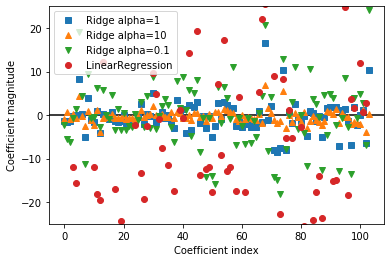

In [106]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

Another way to understand the influence of regularization is to fix alpha but vary the amount of traininf data.  Here is a subsampled for the Boston Housng dataset

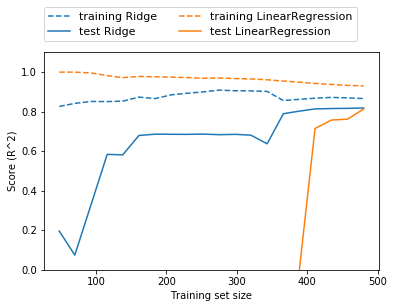

In [107]:
mglearn.plots.plot_ridge_n_samples()

Linear regression does not work well with small sample, but the more data you have, less you need to regularize.

#####The lesson here is with enough training data, regularization becomes less important


### Lasso

Alternative to Ridge

   As with Ridge, the lasso also restricts the coefficients to be close to zero, bu in a different way, called L1 regularization. The consequence is some coeficients are exaclty zero. This means some featurs are entirely ignored by the model.  This can be seen as a form of automatic feature selection.

In [108]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Lasso does quite badly, so there is a indication is underfitting. We can sse it is only using 4 of the 104 features.

As ridge it has a "alpha" parameter for regularization.

In [109]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.

## reducing alpha
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


With the change, the performance is slightly better than using Ridge.


In [110]:
## setting alpha too low gives a overfitting 
#(training score is amazing, but not the test score0)

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

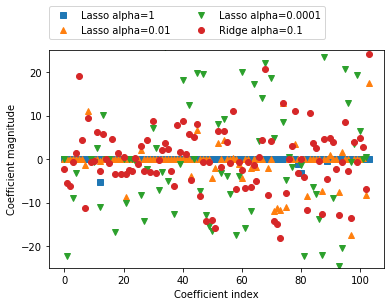

In [111]:
# Finding the "right alpha"

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Usually Ridge is the first choice, but if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.

scikit-learn also provides ElasticNet class, a combination of the two, which usually works better, but has the downside of having two parameters to adjust.

### Linear models for classification

Linear models are also used extensively for classification.

It has similar formula, but instead of returning the weigthed sum of features, we threshold the predicted value at zero.  If the function is smaller than zero, we predict the class -1, if it is larger than zero, we predict  +1.

For linear models for classification, the decision boundary is a function of the input - a line , a plane or hyperplane that separates two classes.

There are many models, all differ in the following way:
    
    The way they measure a particular combination of coefficients and intercepts the fits the training

    if and what kind of regularization they use.
    
Two most common are logistic regression  and Linear SVMS (support vector manchines).

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


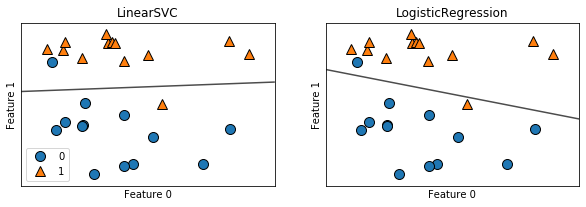

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

As interpretation we can say that any point classified above the line is feature 1 and below is feature 0.
The two models come up with similar decision boundaries.

By defautl both models apply L2 regularization - in the same way as Ridge regression.

For LogisticRegression and LinearSVC trhe trade-off parameter that determines the strenght of the regularization is called C.

Higher values of C correspond to less regularizaiton. In other words, when you use a high value for the parameter C, Logistic regression and LinearSVC try to firt the training set as best as possible, while low values put more emphasis on finding the coeficinet vector (w) that is close to zero.

Another interesting aspect is low values of C cause the algorithm to try to adjust to the majority of data points, while using a higher of C stresses the importance that each individual data point be classified correctly.

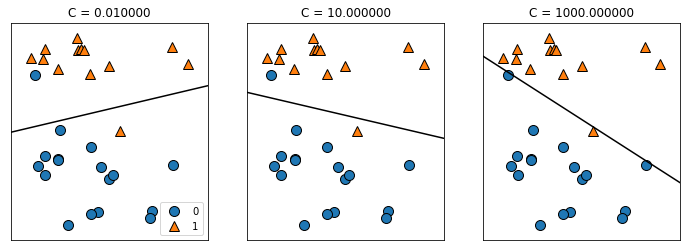

In [113]:
mglearn.plots.plot_linear_svc_regularization()

Left side there is a lot of regularization (small C).

However, as we can see visualy it may be difficult to draw a line that encapsulate all points correctly, so likely this model is overfitting.

#### Analyzing Logistic regression on Breast cancer dataset

In [114]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.951


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The default value of C provided quite good performance.

In [115]:
#Changing C parameter.

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [116]:
#Changing C parameter.

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


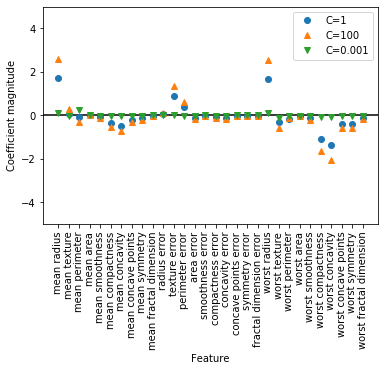

In [117]:
#Visualizing different Cs
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


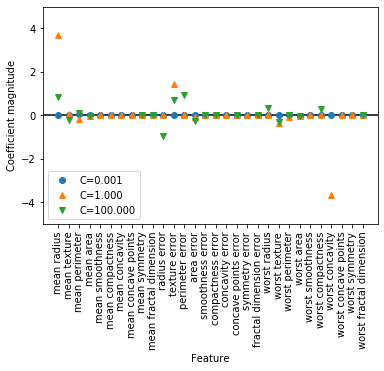

In [118]:
## Using L1 regularization to reduce the ..
#...features and make more interpretable

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### Linear models for multiclass classification

Many linear classificatio models are for binary classification and dont extend naturally for multiclass case (with exception of Logistic regression).

A common approach is the one v.s -rest approach. In the one v.s- rest approach, a binary model is learned for each class that tries to separate the class of the other classes, resulting in as many binary models as there are classes.

Having one binary classifier per class results in having one vector of coerfficients (w) and one intercept (b) for each class.

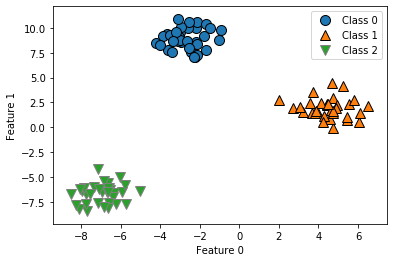

In [119]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [120]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


meaning : each row of coef_ contains the coefficient vector of the three classes and each column holds the value for a specific feature(two)

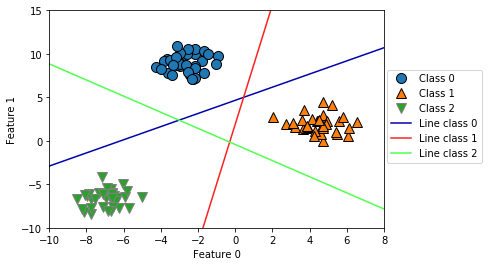

In [121]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

meaning: each line separated a group - but what about then triangule in the middle? 

    answer: the class of the closest line

Text(0, 0.5, 'Feature 1')

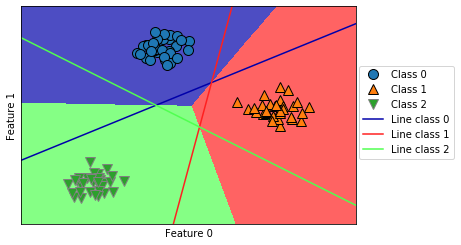

In [122]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Strenghts, weakness and parameters

The main parameter of linear model is the regularization parameter, called "alpha" on regression models and "C" in LinearSVC and Logistic Regression. Finding the right value for the parameters is one of the most important tasks.

Another thing is wheter using L1 or L2 regularization.

The main intuitive difference between the L1 and L2 regularization is that L1 regularization tries to estimate the median of the data while the L2 regularization tries to estimate the mean of the data to avoid overfitting.

If you assume that only a few of your featues are important, otherwise use L2

Linear models are fast to train and fast to predict. They scale well to very large datasets and work well withn sparse datas.

Another strenght it is easy to understand the prediction and they perform well when the number of features is large compared to the number of samples.
They are usually the only choise in very large data sets, because it is not feasible to train other models.

However, they may not be the best choice at lower dimensional space.

### Naive Bayes Classifiers

Tend to be faster on training. 

The price is generalization peformance is slightly worse than linear classifiers.

Three kinds on scikit-learn:
    
    GaussianNB ---  continuous data
    BernoulliNB --- binary data  - mostly used in text classfication
    MultinomialNB--- count data -  mostly used in text classfication
   

BernoulliNB  counts how often each feature of each class is not zero.

In [123]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [124]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### Strengths, weakness and parameters

MultinomialNB and BernoulliNB have a single parameter, alpha, which controls model complexity. A large alpha means more smoothing of statistics, resulting in less complex models.

GaussianNB is mostly used on very high-dimensional data, while the other are used for sparse count data sucha as texts. MultinomiaNB usually performs better than BernoulliNB, particulary on datasets with relatively large number of nonzero features (i.e large documents).

The Naive Bayes share many of then strenghts and weakness of the linear models.
They are fast to train and to predict, and easy to understand.


### Decision Trees

DT are widely used models for classification and regressions tasks. Essentially, they learn a hierarchy of if/else questions leading to a decision.

example - distinguish between the following four animals: bears, hawks, penguins and dolphins.



In [127]:
import sys
sys.path

['',
 '/home/ubuntu/src/cntk/bindings/python',
 '/home/ubuntu/anaconda3/lib/python36.zip',
 '/home/ubuntu/anaconda3/lib/python3.6',
 '/home/ubuntu/anaconda3/lib/python3.6/lib-dynload',
 '/home/ubuntu/anaconda3/lib/python3.6/site-packages',
 '/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/ubuntu/.ipython']

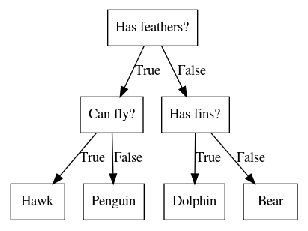

In [131]:
mglearn.plots.plot_animal_tree()

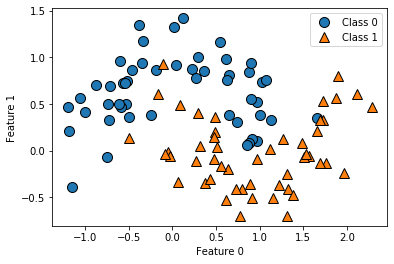

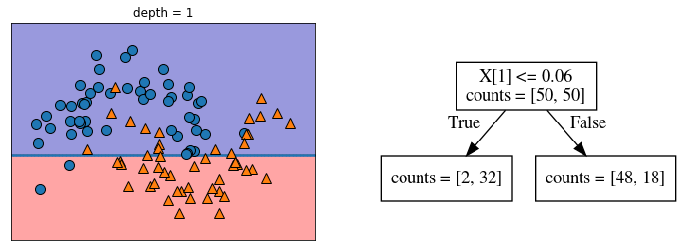

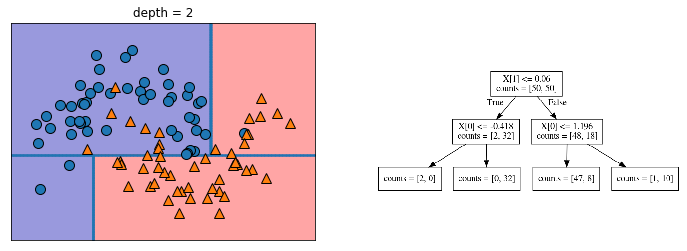

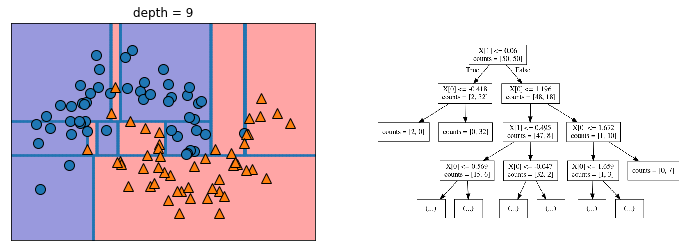

In [130]:
mglearn.plots.plot_tree_progressive()

### Controlling the complexity

Typically, building a tree and continuing until all leaves are pure leads to models that are very comlpex and highly overfit to training data.

The presence of pure leaves mean that the tree is 100% accurate on the training set.


Two common strategies to overcome this:
        
            pre-pruning --> stop the creation of the tree early
            post-pruning--> buidling the tree then removing or collapisng nodes that contain little information


Decision  trees in scikit-learn are implemented in DecisionTreeRegressor and DecisionTreeClassifier classes

In [132]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


As expected the training set is 100%, because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data.

If we dont restrict the depth of a decision tree, the tree can become arbitrarily deep and complex.

Now, lets apply pre-pruning

In [139]:
#setting max depth to 4

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyzing decision trees

In [140]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

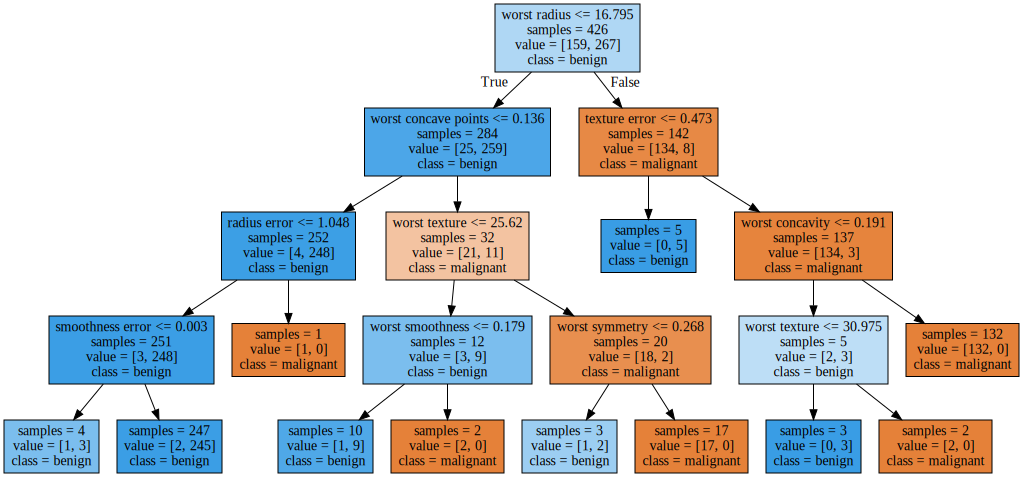

In [141]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

From the right - the tree gets 25 malignant and 259 bening samples
from the left - 134 malignant and 8 benign- The rest of this side of the tree uses some fine distinctions to splitm off these 8 remaining benign

### Feature importance in trees

Instead of looking at the whole tree, which can be taxing, there are useful properties that we can derive to summarizse the workings of the tree.

The mostly common used summary is feature importance.

In [142]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


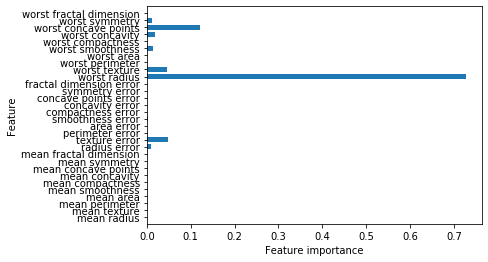

In [143]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Here we can the feature (worst radius) is by far the most important feature.

However, if a feature has a low value in feature importance, it doesn't mean that this feature is uninformative. It only means that the feature was not picked by tree, likely because another feature encodes the same info.

Feature importances: [0. 1.]


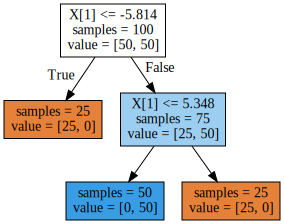

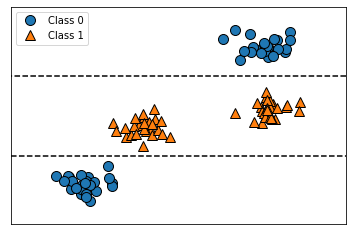

In [144]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

#### Decision tree for regression

Text(0, 0.5, 'Price in $/Mbyte')

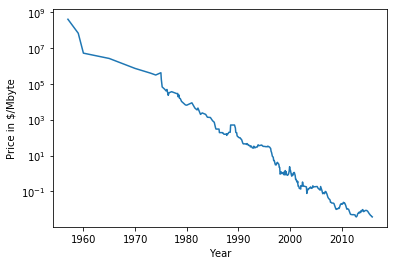

In [145]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

Historical dataset of computer memory (RAM) prices

The logarithmic scale of the y-axis - When plotting in log, the relation seems quite linear and so should be relatively easy to predict

Lets make a forecast for the years after 2000s using historical dat, with the date as our only feature.  We will compare two models: DecisionTreeRegressor and LinearRegression

In [146]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

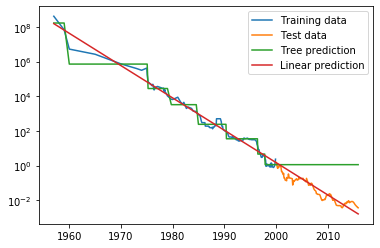

In [147]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

The difference is quite striking. The linear model approximates the data witha line(as we knew it would). This line provides quite a good forecast for the test data.  The tree data, on the other hand makes perfect prediction on the training data,however once we leave the data range for each the model has data - the model get lost and keep predicting the last point.

### Strenghts, weakness and parameters

The parameters that control the model are:

        max_depth
        max_leaf_nodes
        min_samples leaf

Decision trees have two advantages over many algorithms already discussed

        The resulting model can be easily visualzed and understood by no experts
        No pre-processsing (like normalization or standardization of features is needed) - as each feature is processed separately and the possible splits dont depend on scaling
        
        
The main downside is even when using pre-prunning, there is a tendency to overfit and provide poor generalization performance.